In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
%matplotlib inline

# google maps API lib
import googlemaps
import gmaps

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import utm

import osmnx as ox
ox.config(use_cache=True, log_console=True)

import  momepy

In [121]:
cities_to_check = ['Enav', 'Modiin', 'Kiryat Yearim', 'Kfar Yona']

In [122]:
places = ox.gdf_from_places(cities_to_check)

In [125]:
places

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((35.12252 32.28397, 35.12262 32.28365...","Enav, Area C, Judea and Samaria, Palestinian T...",32.288998,32.281995,35.128767,35.122523
1,"POLYGON ((34.93544 31.90904, 34.93694 31.90450...","Modiin-Maccabim-Reut, Center District, 7177657...",31.932770,31.858077,35.039188,34.935444
2,"MULTIPOLYGON (((35.09129 31.80127, 35.09132 31...","Kiryat Yearim, Jerusalem District, Israel",31.809975,31.800957,35.107277,35.091293
3,"POLYGON ((34.90343 32.32061, 34.90380 32.32059...","Kfar Yona, Center District, Israel",32.343502,32.303110,34.953528,34.903433


In [152]:
for i, row in places.iterrows():
    

TypeError: no numeric data to plot

(35.11802318674334, 32.277498919598116, 35.13326352892913, 32.293496511052304)


C:\Users\Tal bauman\Anaconda3\lib\site-packages\geopandas\plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "The dataframe and given column have different number of rows."


(34.93094475078907, 31.85357943296727, 35.04368808941694, 31.937269996618603)
(35.086793824353045, 31.796457818545413, 35.11177370649617, 31.81447429425195)
(34.898933792139076, 32.298610234561934, 34.958023620894906, 32.34799835112047)


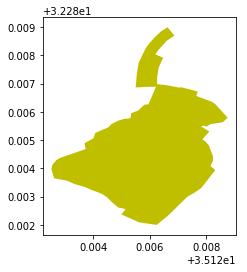

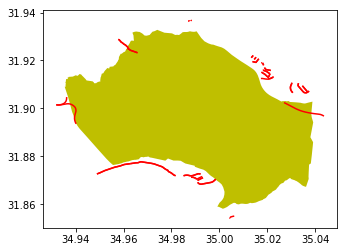

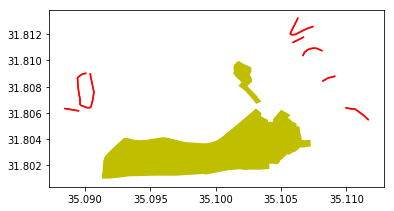

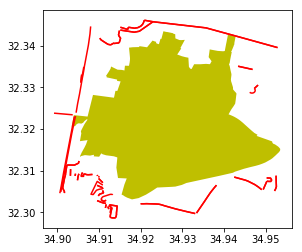

In [229]:
dict_cities = {}
for i, row in places.iterrows():
    city = row['geometry'].buffer(0.000009*500)
    bbox = city.bounds
    print(bbox)
    routes = ox.graph_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], network_type='drive')
    gdf_points, gdf_routes = ox.save_load.graph_to_gdfs(routes)
    intersected = gdf_routes.intersects(city.boundary)
    fig, ax = plt.subplots()
    places[i:i+1].plot(ax=ax, color='y')
    gdf_routes[intersected].plot(ax=ax, color='r')
    dict_cities[row['place_name']] = [city, fig, gdf_points, gdf_routes, gdf_routes[intersected]]

In [230]:
all_routes = []
for city in dict_cities:
    all_routes.append(dict_cities[city][4])

In [231]:
all_routesG = gpd.GeoDataFrame(pd.concat(all_routes))[['geometry']]

In [226]:
# all_routesG.geometry = all_routesG.geometry.apply(lambda x:x.buffer(0.000009*0.15))

In [232]:
all_routesG.to_file(r'C:\Users\Tal bauman\Bauman\geoData\gdf_test\all_routes_intersected.shp')

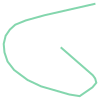

In [176]:
dict_cities['Enav, Area C, Judea and Samaria, Palestinian Territory'][4].iloc[0].geometry

In [185]:
places.to_file(r'C:\Users\Tal bauman\Bauman\geoData\gdf_test\cities.shp')

In [197]:
dict_cities['Enav, Area C, Judea and Samaria, Palestinian Territory'][3][['geometry']].to_file(r'C:\Users\Tal bauman\Bauman\geoData\gdf_test\all_routes.shp')

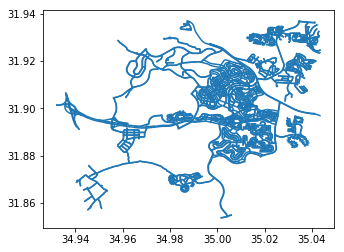

In [237]:
dict_cities['Modiin-Maccabim-Reut, Center District, 7177657, Israel'][3].plot()

In [198]:
dict_cities['Enav, Area C, Judea and Samaria, Palestinian Territory'][4].to_file(r'C:\Users\Tal bauman\Bauman\geoData\gdf_test\crossing.shp')

ValueError: Cannot write empty DataFrame to file.

In [191]:
type(dict_cities['Enav, Area C, Judea and Samaria, Palestinian Territory'][0].boundary.intersection(dict_cities['Enav, Area C, Judea and Samaria, Palestinian Territory'][4].iloc[0].geometry))

IndexError: single positional indexer is out-of-bounds

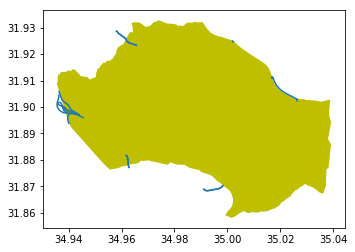

In [143]:
fig, ax = plt.subplots()
places.iloc[1:2].plot(ax=ax, color='y')
gdfs[1][intersected].plot(ax=ax)

In [170]:
(dict_cities['Enav, Area C, Judea and Samaria, Palestinian Territory'][3]).to_file('gdf_test')

In [110]:
places = ox.gdf_from_places(['Modi\'in-Maccabim-Re\'ut'])
# places = ox.project_gdf(places)

In [126]:
places.crs

<Geographic 2D CRS: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

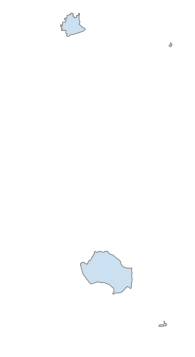

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17346f28c88>)

In [127]:
city = places.geometry.iloc[0]
ox.plot_shape(ox.project_gdf(places))

In [128]:
bbox = places.geometry.bounds.iloc[0]

In [134]:
bbox

minx    35.122523
miny    32.281995
maxx    35.128767
maxy    32.288998
Name: 0, dtype: float64

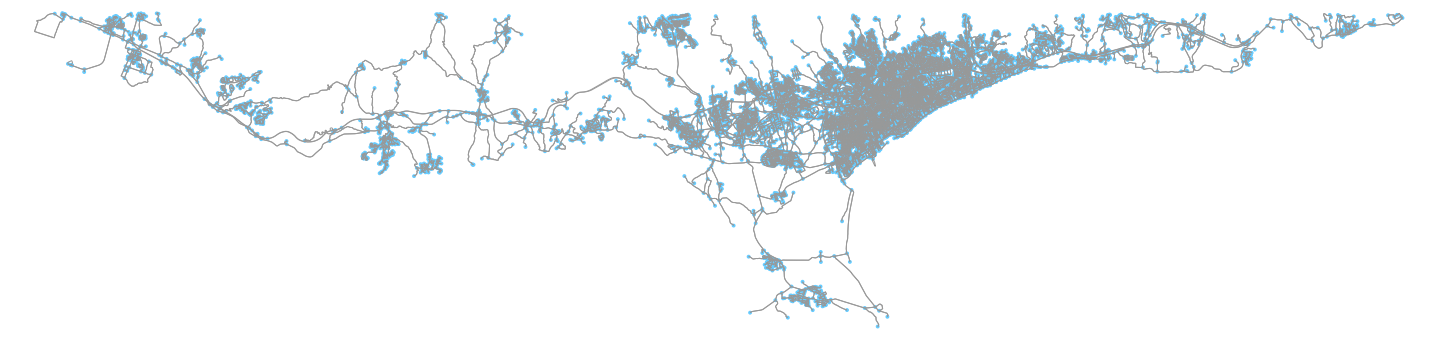

(<Figure size 1835.67x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x173407dd940>)

In [43]:
G = ox.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

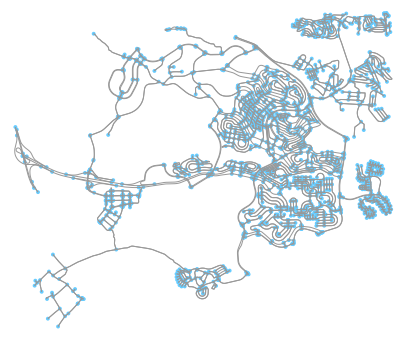

(<Figure size 506.227x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x173472ab630>)

In [114]:
# ox.graph_from_bbox(
#     north,
#     south,
#     east,
#     west,
G2 = ox.graph_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], network_type='drive')
G_projected2 = ox.project_graph(G2)
ox.plot_graph(G_projected2)

In [115]:
gdfs = ox.save_load.graph_to_gdfs(G2)

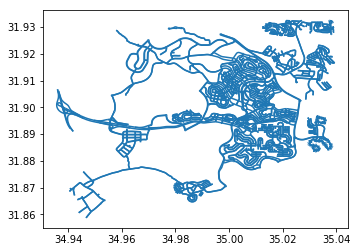

In [116]:
gdfs[1].plot()

In [117]:
intersected = gdfs[1].intersects(city.buffer(-0.00009).boundary)

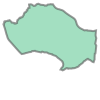

In [118]:
city.buffer(-0.000009)

geometry      POLYGON ((34.9354436 31.9090424, 34.9369375 31...
place_name    Modiin-Maccabim-Reut, Center District, 7177657...
bbox_north                                              31.9328
bbox_south                                              31.8581
bbox_east                                               35.0392
bbox_west                                               34.9354
Name: 1, dtype: object

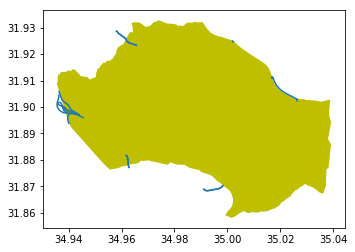

In [143]:
fig, ax = plt.subplots()
places.iloc[1:2].plot(ax=ax, color='y')
# gdfs[1].plot(ax=ax)
gdfs[1][intersected].plot(ax=ax)

In [148]:
places.iloc[1:2]

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
1,"POLYGON ((34.93544 31.90904, 34.93694 31.90450...","Modiin-Maccabim-Reut, Center District, 7177657...",31.93277,31.858077,35.039188,34.935444


In [145]:
print(fig)

Figure(432x288)


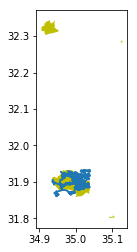

In [133]:
fig, ax = plt.subplots()
places.plot(ax=ax, color='y')
gdfs[1].plot(ax=ax)
# gdfs[1][intersected].plot(ax=ax)

In [130]:
gdfs[1].name

0        חיים ברלב
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4587    חטיבת הנגב
4588           NaN
4589           NaN
4590      משה דיין
4591      משה דיין
Name: name, Length: 4592, dtype: object